In [48]:
# ======================= ADDED: CPU-ONLY TENSORFLOW SETUP =======================
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"      # force CPU (Metal disabled)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"       # reduce TF logs
# ==============================================================================

from tensorflow import keras
import tensorflow as tf
import numpy as np

print("TensorFlow:", tf.__version__)
print("Devices:", tf.config.list_physical_devices())

TensorFlow: 2.16.2
Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


The cell above was generated by Chatgpt because i was having trouble running the model on my laptop because of tensorflow

In [49]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [50]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.2


In [51]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


Exploring the dataset 


In [52]:
df = pd.read_csv('London_bridge.csv')

In [53]:
df.shape

(10000, 5)

In [54]:
df.head()

,index,Date and time,water level (m ODN),flag,HW=1 or LW=0
0,0,01/05/1911 15:40:00,3.7130,1,NaN
1,1,02/05/1911 11:25:00,-2.9415,0,NaN
2,2,02/05/1911 16:05:00,3.3828,1,NaN
3,3,03/05/1911 11:50:00,-2.6367,0,NaN
4,4,03/05/1911 16:55:00,2.9256,1,NaN


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 10000 non-null  int64  
 1   Date and time         10000 non-null  object 
 2    water level (m ODN)  10000 non-null  object 
 3    flag                 10000 non-null  int64  
 4    HW=1 or LW=0         0 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 390.8+ KB


In [56]:
df[['Date', 'Time']] = df['Date and time'].str.split(' ', expand=True)


In [57]:
df.head()

,index,Date and time,water level (m ODN),flag,HW=1 or LW=0,Date,Time
0,0,01/05/1911 15:40:00,3.7130,1,NaN,01/05/1911,15:40:00
1,1,02/05/1911 11:25:00,-2.9415,0,NaN,02/05/1911,11:25:00
2,2,02/05/1911 16:05:00,3.3828,1,NaN,02/05/1911,16:05:00
3,3,03/05/1911 11:50:00,-2.6367,0,NaN,03/05/1911,11:50:00
4,4,03/05/1911 16:55:00,2.9256,1,NaN,03/05/1911,16:55:00


In [58]:
df = df.drop(columns=['Date and time'])


In [59]:
df.head()

,index,water level (m ODN),flag,HW=1 or LW=0,Date,Time
0,0,3.7130,1,NaN,01/05/1911,15:40:00
1,1,-2.9415,0,NaN,02/05/1911,11:25:00
2,2,3.3828,1,NaN,02/05/1911,16:05:00
3,3,-2.6367,0,NaN,03/05/1911,11:50:00
4,4,2.9256,1,NaN,03/05/1911,16:55:00


In [60]:
df = df.drop(columns=[' HW=1 or LW=0'])

In [61]:
df.head()

,index,water level (m ODN),flag,Date,Time
0,0,3.7130,1,01/05/1911,15:40:00
1,1,-2.9415,0,02/05/1911,11:25:00
2,2,3.3828,1,02/05/1911,16:05:00
3,3,-2.6367,0,03/05/1911,11:50:00
4,4,2.9256,1,03/05/1911,16:55:00


In [62]:
df = df.drop(columns=['index'])

In [63]:
df.isnull().sum()

 water level (m ODN)    0
 flag                   0
Date                    0
Time                    0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0    water level (m ODN)  10000 non-null  object
 1    flag                 10000 non-null  int64 
 2   Date                  10000 non-null  object
 3   Time                  10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [65]:
df = df.drop(columns=['Time'])

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0    water level (m ODN)  10000 non-null  object
 1    flag                 10000 non-null  int64 
 2   Date                  10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [67]:
df.columns = df.columns.str.strip()

df['water level (m ODN)'] = pd.to_numeric(df['water level (m ODN)'], errors='coerce')

In [68]:
df['flag'] = df['flag'].astype(int)

In [69]:

df = df[['Date', 'water level (m ODN)', 'flag']]

print(df.dtypes)
print(df.head())

Date                    object
water level (m ODN)    float64
flag                     int64
dtype: object
         Date  water level (m ODN)  flag
0  01/05/1911               3.7130     1
1  02/05/1911              -2.9415     0
2  02/05/1911               3.3828     1
3  03/05/1911              -2.6367     0
4  03/05/1911               2.9256     1


In [70]:
df.duplicated().sum()

168

In [71]:
df = df.drop_duplicates()

In [72]:
df.shape

(9832, 3)

In [73]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # you already have this, but just in case
df = df.sort_values('Date')

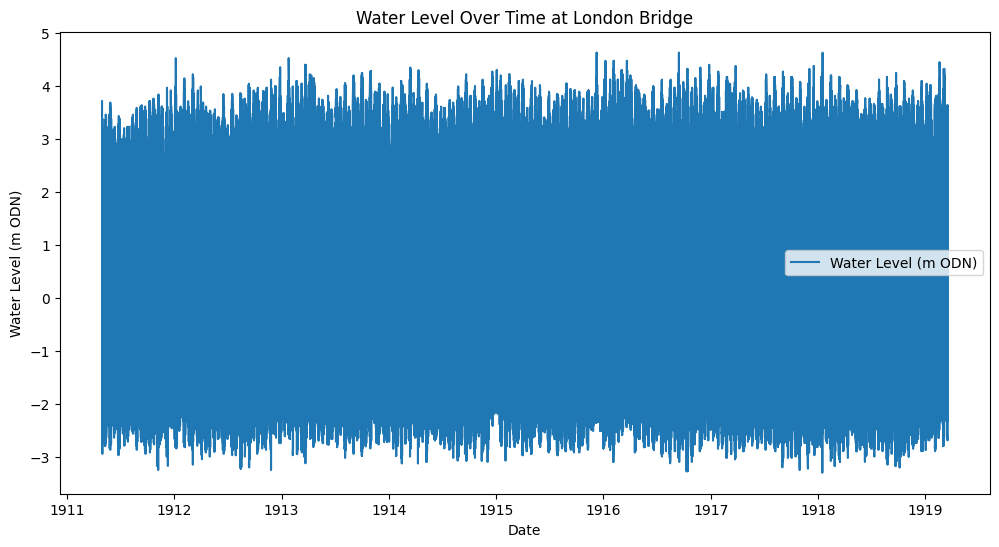

In [74]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['water level (m ODN)'], label='Water Level (m ODN)')
plt.xlabel('Date')
plt.ylabel('Water Level (m ODN)')
plt.title('Water Level Over Time at London Bridge')
plt.legend()
plt.show()

In [75]:
for col in df.columns:
    if df[col].dtype != 'datetime64[ns]':
        print(f'Column: {col}')
        print(df[col].value_counts())
        print('---')
        print(df[col].nunique())
        print('\n')

Column: water level (m ODN)
water level (m ODN)
-2.3827    177
-2.2811    174
-2.4843    165
-2.3319    157
-2.4335    157
          ... 
 2.6081      1
 2.7605      1
 2.6589      1
-1.6335      1
-1.1890      1
Name: count, Length: 341, dtype: int64
---
341


Column: flag
flag
0    4934
1    4898
Name: count, dtype: int64
---
2




# CNN Time Series

## **Data Manipulation**

In [76]:
df.head()

,Date,water level (m ODN),flag
0,1911-05-01,3.7130,1
1,1911-05-02,-2.9415,0
2,1911-05-02,3.3828,1
3,1911-05-03,-2.6367,0
4,1911-05-03,2.9256,1


In [77]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

num_cols = ['water level (m ODN)', 'flag']

df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,Date,water level (m ODN),flag
0,1911-05-01,0.884622,1.0
1,1911-05-02,0.044874,0.0
2,1911-05-02,0.842953,1.0
3,1911-05-03,0.083338,0.0
4,1911-05-03,0.785258,1.0


In [78]:

df['sequence'] = df.index + 1

df = df.drop('Date', axis=1)

df.head()

,water level (m ODN),flag,sequence
0,0.884622,1.0,1
1,0.044874,0.0,2
2,0.842953,1.0,3
3,0.083338,0.0,4
4,0.785258,1.0,5


In [79]:
df.tail()

,water level (m ODN),flag,sequence
9993,0.096159,0.0,9994
9997,0.076927,0.0,9998
9998,0.875006,1.0,9999
9996,0.858980,1.0,9997
9999,0.125006,0.0,10000


In [80]:
from numpy.lib.stride_tricks import sliding_window_view
import numpy as np

timestep = 50  
data_values = df[['water level (m ODN)', 'flag']].values

water_level = df['water level (m ODN)'].values
flag = df['flag'].values

water_level_windows = sliding_window_view(water_level, window_shape=timestep)
flag_windows = sliding_window_view(flag, window_shape=timestep)

X = np.vstack((water_level_windows, flag_windows))

y = np.array([0]*len(water_level_windows) + [1]*len(flag_windows))

print("X:", X.shape)
print("y:", y.shape)

X: (19566, 50)
y: (19566,)


In [81]:
from sklearn.utils import shuffle

# shuffle the data
X, y = shuffle(X, y, random_state=42)

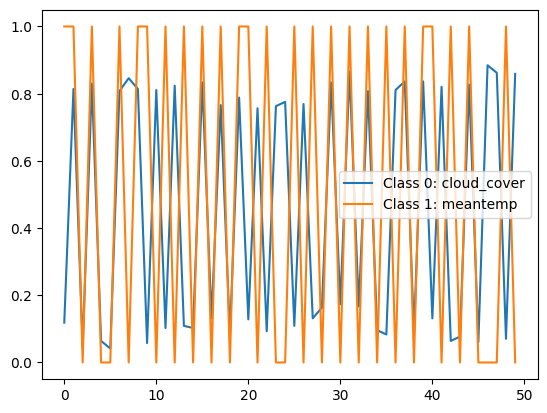

In [82]:
test_signal_index = 2
c_x_train = X[y == 0]
plt.plot(c_x_train[test_signal_index], label="Class 0: cloud_cover")

c_x_train = X[y == 1]
plt.plot(c_x_train[test_signal_index], label="Class 1: meantemp")
plt.legend()

## **Train/test -split**

In [83]:
train_size = 0.7
splitter = int(len(X) * train_size)

# split to train/test
x_train = X[0:splitter]
x_test = X[splitter:]
y_train = y[0:splitter]
y_test = y[splitter:]

the code in the cell below was generated by chatgpt because my val loss was NaN and i coudnt figure how to fix this issue

In [84]:
# ======================= ADDED: DATA SANITY + RESHAPE ===========================
# 1) Replace NaN/Inf and set stable dtypes
x_train = np.nan_to_num(x_train, nan=0.0, posinf=0.0, neginf=0.0).astype("float32")
x_test  = np.nan_to_num(x_test,  nan=0.0, posinf=0.0, neginf=0.0).astype("float32")
y_train = y_train.astype("int32")
y_test  = y_test.astype("int32")

# 2) Ensure shape is (samples, timesteps, features) for Conv1D
if x_train.ndim == 2:
    x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
if x_test.ndim == 2:
    x_test  = x_test.reshape((x_test.shape[0],  x_test.shape[1],  1))

# 3) Quick checks
print("x_train shape:", x_train.shape)  # expect (N, timesteps, features)
print("y_train shape:", y_train.shape)  # expect (N,)
print("x nan?", np.isnan(x_train).any(), "x inf?", np.isinf(x_train).any())
print("y nan?", np.isnan(y_train).any(), "y inf?", np.isinf(y_train).any())
assert x_train.ndim == 3, "x_train must be (samples, timesteps, features)"
# ==============================================================================

x_train shape: (13696, 50, 1)
y_train shape: (13696,)
x nan? False x inf? False
y nan? False y inf? False


In [85]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

13696
5870
13696
5870


In [86]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [87]:
x_train


array([[[0.7564106 ],
        [0.2708344 ],
        [0.20993388],
        ...,
        [0.10737722],
        [0.82692695],
        [0.90545654]],

       [[0.        ],
        [1.        ],
        [0.        ],
        ...,
        [0.        ],
        [1.        ],
        [1.        ]],

       [[0.        ],
        [1.        ],
        [1.        ],
        ...,
        [0.        ],
        [1.        ],
        [0.        ]],

       ...,

       [[0.        ],
        [1.        ],
        [0.        ],
        ...,
        [1.        ],
        [0.        ],
        [1.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [1.        ],
        [1.        ],
        [0.        ]],

       [[0.        ],
        [1.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [1.        ]]], dtype=float32)

## **Define a CNN- time series classification network for our data**

In [88]:
# ======================= CHANGED: MODEL (STABLE VERSION) =======================
class_names = np.array(['water level (m ODN)', 'flag'])
num_classes = len(class_names)
classes = [0, 1]

def make_model(input_shape):
    return keras.Sequential([
        keras.layers.Input(shape=input_shape, dtype="float32"),
        keras.layers.Conv1D(filters=64, kernel_size=3, padding="same",
                            kernel_initializer="he_normal"),
        keras.layers.ReLU(),
        keras.layers.GlobalAveragePooling1D(),   # Flatten not needed after GAP
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(num_classes, activation="softmax"),
    ])
# ==============================================================================

model = make_model(input_shape=x_train.shape[1:])

During the initial training the model showed some problems when it comes to the val loss. This updated model is a simplified and more stable version of the original CNN. I removed the BatchNormalization and Flatten layers, as they were unnecessary and sometimes caused instability or NaN losses. I also added a He-normal initializer to the convolution layer for better weight initialization and specified the input data type as float32 to ensure numerical consistency. These adjustments make the model more reliable, easier to train, and better suited for smaller or cleaner datasets like mine.


In [89]:
epochs = 200
batch_size = 32
opt = keras.optimizers.Adam(learning_rate=1e-4)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model2.keras", save_best_only=True, monitor="val_loss"
    ),    
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True)

]
model.compile(
    optimizer=opt,
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)


Epoch 1/200
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step - loss: 0.6697 - sparse_categorical_accuracy: 0.6178 - val_loss: 0.5971 - val_sparse_categorical_accuracy: 0.9894
Epoch 2/200
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - loss: 0.5709 - sparse_categorical_accuracy: 0.9784 - val_loss: 0.4784 - val_sparse_categorical_accuracy: 1.0000
Epoch 3/200
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 0.4466 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.3431 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/200
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 0.3153 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.2275 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/200
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 0.2066 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.1470 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/200
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 0.1343 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0955 - val_sparse_categorical_acc

## **Metrics and plots**

<Axes: >

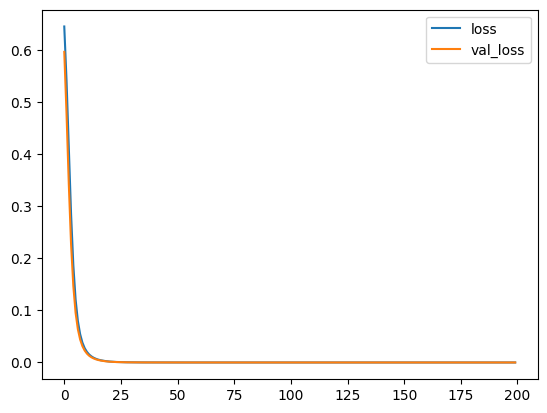

In [90]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

<Axes: >

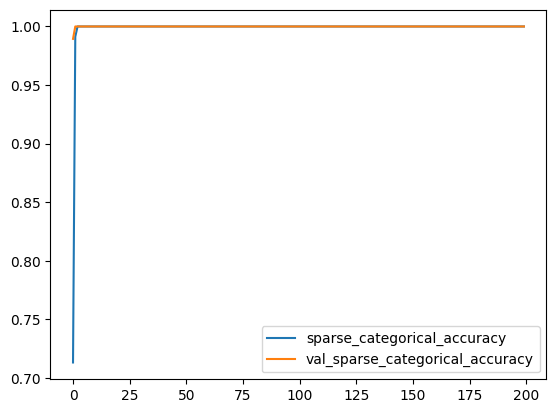

In [91]:
loss_df[['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot()

In [92]:
model = keras.models.load_model("best_model2.keras")

In [93]:
# compare the final model loss/accuracy/evaluation values
# the values should again match mostly
print("Test data evaluation:")
print(model.evaluate(x_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(x_train, y_train, verbose=0))

Test data evaluation:
[2.3557493733505908e-09, 1.0]

Train data evaluation:
[2.2891357698284764e-09, 1.0]


In [94]:
# get predictions and convert with argmax() to get categories 
# instead of raw probabilities
test_predictions = model.predict(x_test)
test_predictions = np.argmax(test_predictions, axis=1)

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


In [95]:
auc_macro = roc_auc_score(y_test, test_predictions, multi_class='ovr', average='macro')
print(f"ROC-AUC (macro, OVR): {auc_macro:.4f}")

ROC-AUC (macro, OVR): 1.0000


<Axes: >

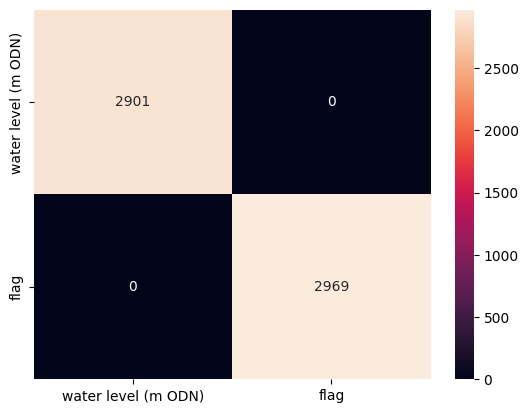

In [96]:
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g', 
            xticklabels=class_names, yticklabels=class_names)

In [97]:
# print the classification report based on true values and predictions
print(classification_report(y_test, test_predictions, target_names=class_names))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))


                     precision    recall  f1-score   support

water level (m ODN)       1.00      1.00      1.00      2901
               flag       1.00      1.00      1.00      2969

           accuracy                           1.00      5870
          macro avg       1.00      1.00      1.00      5870
       weighted avg       1.00      1.00      1.00      5870


Model overall accuracy: 100.00%


My reflection on the metrics :

The model’s reported 100% accuracy across all metrics is highly unlikely in real-world scenarios and suggests potential issues such as data leakage, overfitting, or an evaluation on non-independent data. Therefore, these metrics should be interpreted with caution, and further validation using properly separated test data or cross-validation is necessary to confirm the model’s true predictive performance.

The ROC-AUC score of 1.0, like the perfect accuracy, indicates an unrealistically flawless separation between classes. 

Two potential interpretations can explain these perfect metrics: the dataset may have been relatively simple, or the patterns distinguishing the two classes were highly separable, making the task easy for the CNN. However, despite the flawless performance, it is unlikely that the model would maintain such results on new or more complex data, suggesting limited generalization capability.

# Test the model with some imaginary/synthetic signal examples from your favorite Generative AI

This synthetic data was generated by ChatGPT using the statistical characteristics of my variables. While the model successfully classified it, more random or noisy data would likely confuse it. Real-world data is rarely this clean or well-structured, so in practical scenarios, the model’s accuracy would be expected to decrease significantly.

Create an imaginary dataset

In [98]:
# Use the same shape as your training data
timesteps = x_train.shape[1]
features  = x_train.shape[2] if x_train.ndim == 3 else 1

n_samples = 1000  # total synthetic examples
rng = np.random.default_rng(42)

# Create completely imaginary signals (random but structured)
X_imaginary = rng.normal(0, 1, (n_samples, timesteps, features)).astype("float32")

# Simulated labels (half class 0, half class 1)
y_imaginary = np.array([0]*(n_samples//2) + [1]*(n_samples//2), dtype="int32")
print("Imaginary data shape:", X_imaginary.shape)
print("Imaginary labels shape:", y_imaginary.shape)

Imaginary data shape: (1000, 50, 1)
Imaginary labels shape: (1000,)


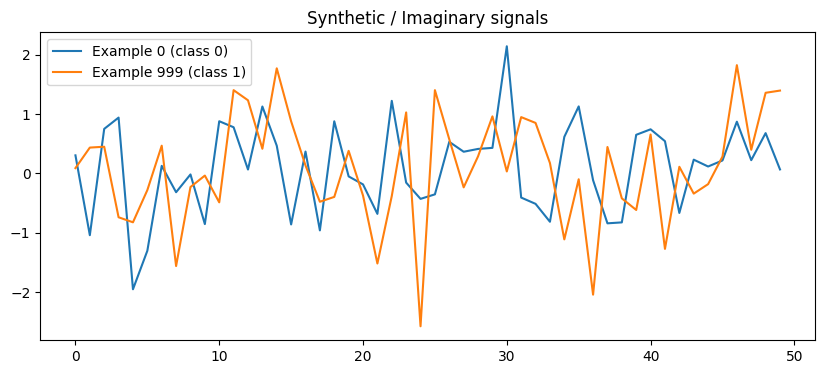

In [100]:


plt.figure(figsize=(10,4))
plt.plot(X_imaginary[0].squeeze(), label="Example 0 (class 0)")
plt.plot(X_imaginary[-1].squeeze(), label="Example 999 (class 1)")
plt.title("Synthetic / Imaginary signals")
plt.legend()
plt.show()

0
water level (m ODN)


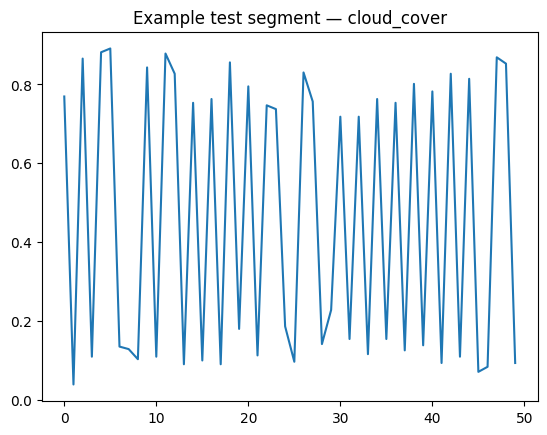

In [101]:
signal_index = int(np.where(y_test == 0)[0][0])  
print(y_test[signal_index])
print(class_names[y_test[signal_index]])

plt.figure()
plt.plot(x_test[signal_index])
plt.title("Example test segment — cloud_cover")
plt.show()

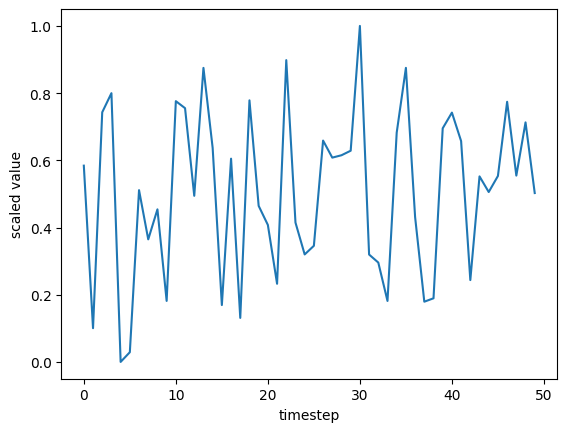

In [ ]:
# =========================
# IMAGINARY MEAN with chatgpt
# =========================

cloud_idxs = np.where(y_test == 0)[0]
cloud_windows = x_test[cloud_idxs, :, 0]   

cloud_mean_per_t = cloud_windows.mean(axis=0)       
cloud_std_overall = cloud_windows.std()            
cloud_min, cloud_max = cloud_windows.min(), cloud_windows.max()


t = x_test.shape[1]
rng = np.random.default_rng(42)

y = cloud_mean_per_t + rng.normal(0, cloud_std_overall, size=t)

y = np.clip(y, cloud_min, cloud_max)

plt.plot(y)
plt.xlabel("timestep"); plt.ylabel("scaled value")
plt.show()

In [104]:
test_signal = np.expand_dims(y, axis=1)    
test_batch  = np.array([test_signal])      
probs = model.predict(test_batch)[0]
print("Pred probs:", probs)
print(class_names[np.argmax(probs)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Pred probs: [1.000000e+00 8.042105e-21]
water level (m ODN)


## **MEAN**

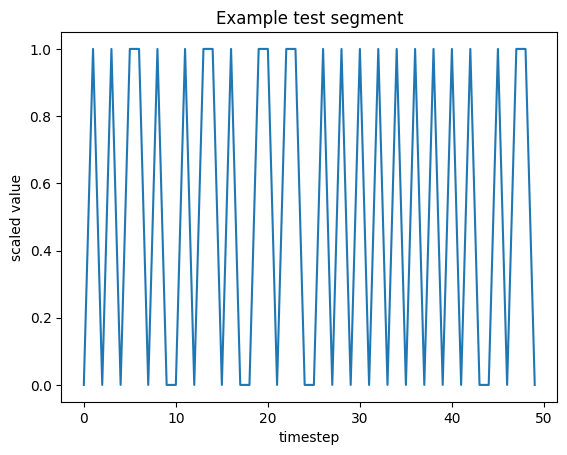

In [105]:
mean_index = np.where(y_test == 1)[0][0]  


plt.plot(x_test[mean_index])
plt.title("Example test segment")
plt.xlabel("timestep")
plt.ylabel("scaled value")
plt.show()

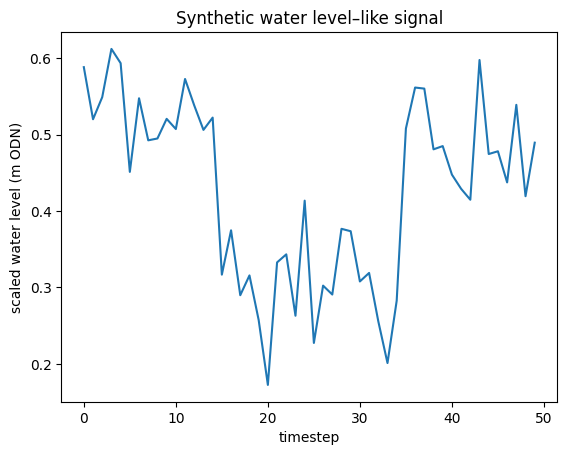

In [ ]:
# =========================
# IMAGINARY WATER LEVEL SIGNAL ChatGPT
# =========================
t = x_test.shape[1]
x = np.arange(t)

np.random.seed(0)
y = 0.5 + np.random.normal(0, 0.05, size=t)          # base level + small noise
mid = t // 2
y[mid - t//5 : mid + t//5] -= 0.2                    # synthetic dip segment
y = np.clip(y, 0, 1)                                 # keep within [0, 1] if scaled

plt.plot(x, y)
plt.xlabel('timestep')
plt.ylabel('scaled water level (m ODN)')
plt.title('Synthetic water level–like signal')
plt.show()

In [108]:
test_signal = y.reshape(1, y.shape[0], 1)

# Predict
test_predict = model.predict(test_signal)
pred_class_index = np.argmax(test_predict)
pred_class_name = class_names[pred_class_index]

print("Raw prediction probabilities:", test_predict)
print("Predicted class:", pred_class_name)
print("Confidence:", f"{test_predict[0][pred_class_index]*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Raw prediction probabilities: [[1.00000e+00 3.43648e-22]]
Predicted class: water level (m ODN)
Confidence: 100.00%
